In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
states = pd.read_csv('agent_states.csv', index_col = 0)
deliveries = pd.read_csv('deliveries.csv', index_col = 0)
stillbirths = pd.read_csv('stillbirths.csv', index_col = 0)

In [59]:
states

,i,age,active,method,pregnant,parity,postpartum,personal fecundity,lam,age-based fecundity
0,0,9.163919,False,0,False,0,False,0.91885,False,0.000000
1,1,9.247252,False,0,False,0,False,0.91885,False,0.000000
2,2,9.330585,False,0,False,0,False,0.91885,False,0.000000
3,3,9.413919,False,0,False,0,False,0.91885,False,0.000000
4,4,9.497252,False,0,False,0,False,0.91885,False,0.000000
...,...,...,...,...,...,...,...,...,...,...
344,344,37.830585,True,3,False,7,True,0.91885,False,0.619305
345,345,37.913919,True,3,False,7,True,0.91885,False,0.619305
346,346,37.997252,True,3,False,7,True,0.91885,False,0.619305
347,347,38.080585,True,3,False,7,True,0.91885,False,0.582857


In [60]:
states = states.replace(False, np.nan)
states = states.replace(True, 1)
states['on method'] = np.where((states['method'] != 0), 1, np.nan)

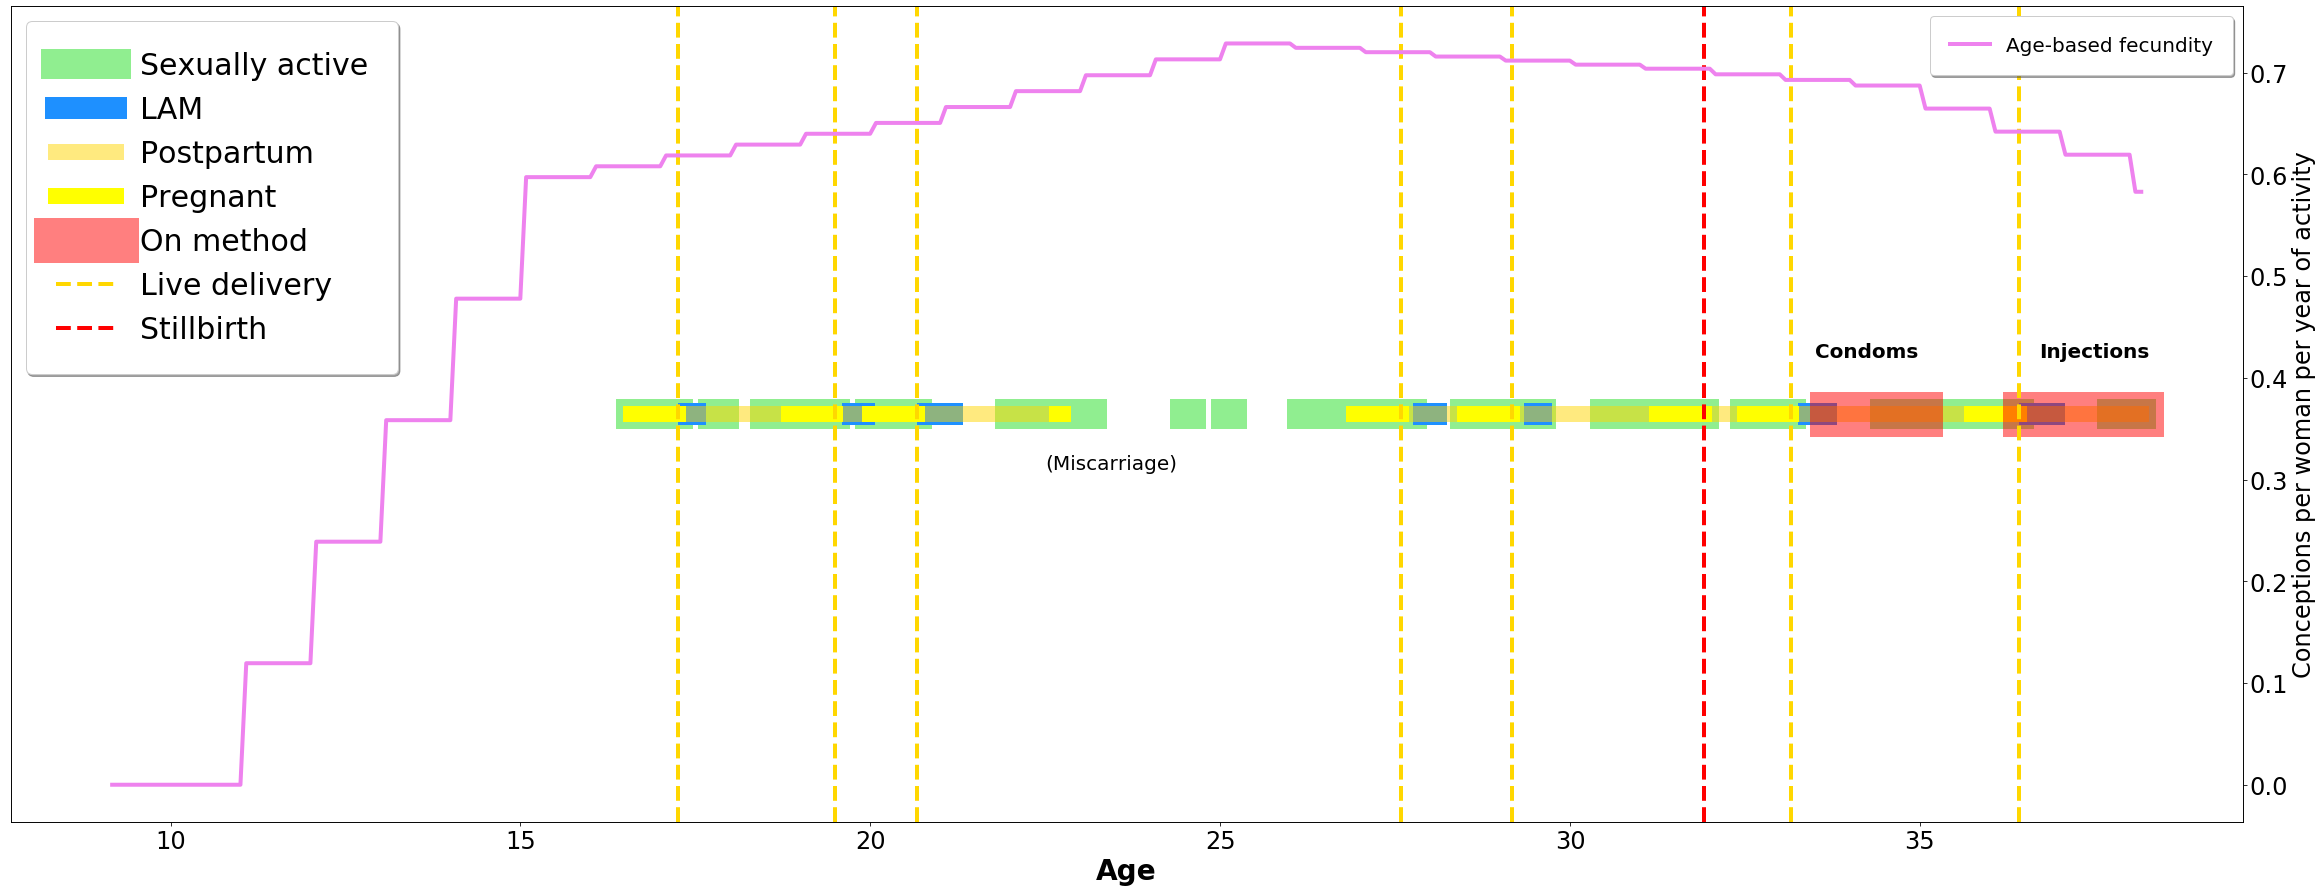

In [153]:
fig,ax = plt.subplots(figsize = (40,15))

plot_1 = ax.plot(states['age'], states['active'], color = 'lightgreen', linewidth = 30, label = 'Sexually active')
plot_2 = ax.plot(states['age'], states['lam'], color = 'dodgerblue', linewidth = 22, label = 'LAM')
plot_3 = ax.plot(states['age'], states['postpartum'], color = 'gold', alpha = 0.5, linewidth = 16, label = 'Postpartum')
plot_4 = ax.plot(states['age'], states['pregnant'], color = 'yellow', linewidth = 16, label = 'Pregnant')
plot_5 = ax.plot(states['age'], states['on method'], color = 'red', alpha=0.5, linewidth = 45, label = 'On method')

for x in deliveries['live deliveries'][:-1]:
    ax.axvline(x = x, color = 'gold', linestyle = '--', linewidth = 4)
    
ax.axvline(x = deliveries['live deliveries'].iloc[-1], color = 'gold', linestyle = '--', linewidth = 4, label = "Live delivery")

for s in stillbirths['stillbirths'][:-1]:
    ax.axvline(x = s, color = 'r', linestyle = '--', linewidth = 4,)
    
ax.axvline(x = stillbirths['stillbirths'].iloc[-1], color = 'r', linestyle = '--', linewidth = 4, label = "Stillbirth")
        
ax.legend(prop={"size":30}, fancybox=True, framealpha=1, shadow=True, borderpad=1)

ax.set_yticks([])


ax2=ax.twinx()
plot_5 = ax2.plot(states['age'], states['age-based fecundity'] , color = 'violet', marker=",", linewidth = 4, label = "Age-based fecundity")
ax2.annotate('Condoms', (33.5, 0.42), fontsize = 20, fontweight = 'bold')
ax2.annotate('Injections', (36.7, 0.42), fontsize = 20, fontweight = 'bold')
ax2.annotate('(Miscarriage)', (22.5, 0.31), fontsize = 20)

ax2.set_ylabel("Conceptions per woman per year of activity", fontsize=24)
ax.set_xlabel("Age", fontsize = 28, fontweight = 'bold')

ax2.legend(prop={"size":20}, fancybox=True, framealpha=1, shadow=True, borderpad=1)

ax.tick_params(labelsize= 24)
ax2.tick_params(labelsize= 24)

#plt.savefig('Life of an agent.png')